In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(X.head())
print(y.value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [2]:
X.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
dtype: int64

In [3]:
df_new = X
df_new.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [4]:
df_new = pd.get_dummies(df_new, drop_first=True) # it is a short cut to avoid dummy variable trap it is just dropping the main column whose dummies we have produced. 
df_new

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8, random_state=42)

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

results = []

for k in [2, 3, 5, 7, 10, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    

    scores_kf = cross_val_score(knn, x_train, y_train, cv=kf, scoring='f1')

    scores_skf = cross_val_score(knn, x_train, y_train, cv=skf, scoring='f1')
    
    results.append({
        "k": k,
        "F1_KFold_1": scores_kf[0],
        "F1_KFold_2": scores_kf[1],
        "F1_KFold_3": scores_kf[2],
        "F1_KFold_4": scores_kf[3],
        "F1_KFold_5": scores_kf[4],
        "F1_KFold_mean": scores_kf.mean(),
        "F1_Stratified_1": scores_skf[0],
        "F1_Stratified_2": scores_skf[1],
        "F1_Stratified_3": scores_skf[2],
        "F1_Stratified_4": scores_skf[3],
        "F1_Stratified_5": scores_skf[4],
        "F1_Stratified_mean": scores_skf.mean()
    })

df_results = pd.DataFrame(results)

print(df_results.round(4))


    k  F1_KFold_1  F1_KFold_2  F1_KFold_3  F1_KFold_4  F1_KFold_5  \
0   2      0.9636      0.9739      0.9388      0.9573      0.9672   
1   3      0.9821      0.9916      0.9709      0.9593      0.9606   
2   5      0.9735      0.9916      0.9714      0.9508      0.9683   
3   7      0.9735      0.9916      0.9903      0.9508      0.9683   
4  10      0.9558      0.9916      0.9903      0.9677      0.9760   
5  15      0.9649      0.9833      0.9808      0.9524      0.9606   

   F1_KFold_mean  F1_Stratified_1  F1_Stratified_2  F1_Stratified_3  \
0         0.9602           0.9828           0.9649           0.9358   
1         0.9729           0.9744           0.9655           0.9655   
2         0.9711           0.9744           0.9744           0.9744   
3         0.9749           0.9831           0.9744           0.9744   
4         0.9763           0.9748           0.9828           0.9483   
5         0.9684           0.9748           0.9744           0.9421   

   F1_Stratified_4

   Train Test 0.2
   k  F1_KFold_1  F1_KFold_2  F1_KFold_3  F1_KFold_4  F1_KFold_5  \
0  2      0.9636      0.9739      0.9388      0.9573      0.9672   
1  3      0.9821      0.9916      0.9709      0.9593      0.9606   
2  5      0.9735      0.9916      0.9714      0.9508      0.9683   
3  7      0.9735      0.9916      0.9903      0.9508      0.9683   

   F1_KFold_mean  F1_Stratified_1  F1_Stratified_2  F1_Stratified_3  \
0         0.9602           0.9828           0.9649           0.9358   
1         0.9729           0.9744           0.9655           0.9655   
2         0.9711           0.9744           0.9744           0.9744   
3         0.9749           0.9831           0.9744           0.9744   

   F1_Stratified_4  F1_Stratified_5  F1_Stratified_mean  
0           0.9739           0.9735              0.9662  
1           0.9744           0.9492              0.9658  
2           0.9744           0.9573              0.9709  
3           0.9744           0.9573              0.9727  

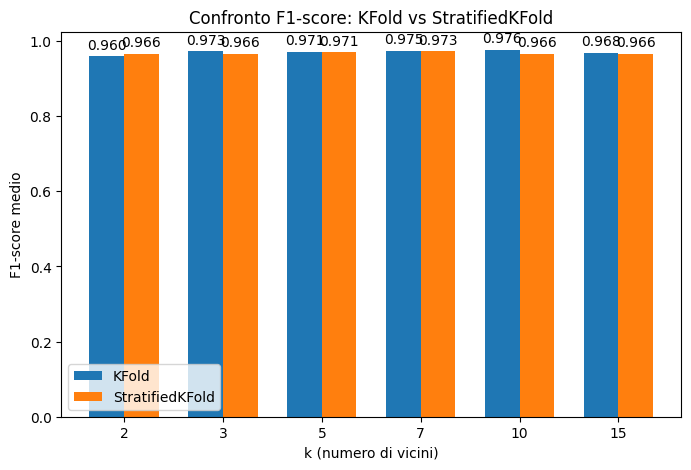

In [9]:
import matplotlib.pyplot as plt
import numpy as np

k_values = df_results['k']
f1_kfold = df_results['F1_KFold_mean']
f1_skf = df_results['F1_Stratified_mean']

x = np.arange(len(k_values))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, f1_kfold, width, label='KFold')
rects2 = ax.bar(x + width/2, f1_skf, width, label='StratifiedKFold')


ax.set_xlabel('k (numero di vicini)')
ax.set_ylabel('F1-score medio')
ax.set_title('Confronto F1-score: KFold vs StratifiedKFold')
ax.set_xticks(x)
ax.set_xticklabels(k_values)
ax.legend()


for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0,3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


KNN (k=10) Test Accuracy: 0.9561
KNN (k=10) Test F1-score: 0.9645

Confusion Matrix:
[[41  2]
 [ 3 68]]


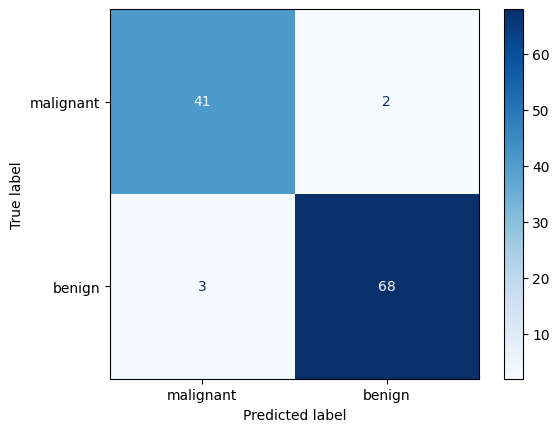

In [10]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# Scegliamo il k migliore in base alla cross-validation (per esempio k=7)
best_k = 10
knn_final = KNeighborsClassifier(n_neighbors=best_k)

# Fit sul training set
knn_final.fit(x_train, y_train)

# Predizione sul test set
y_pred_test = knn_final.predict(x_test)

# Metriche
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print(f"KNN (k={best_k}) Test Accuracy: {acc:.4f}")
print(f"KNN (k={best_k}) Test F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Visualizziamo la confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [13]:
from xgboost import XGBClassifier

results_xgb = []

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    eval_metric='logloss',
    random_state=42
)


scores_kf_xgb = cross_val_score(xgb, x_train, y_train, cv=kf, scoring='f1')
scores_skf_xgb = cross_val_score(xgb, x_train, y_train, cv=skf, scoring='f1')

results_xgb.append({
    "F1_KFold_mean": scores_kf_xgb.mean(),
    "F1_Stratified_mean": scores_skf_xgb.mean()
})

df_xgb = pd.DataFrame(results_xgb)

print("\n=== XGBoost Results ===")
print(df_xgb.round(4))



=== XGBoost Results ===
   F1_KFold_mean  F1_Stratified_mean
0         0.9667              0.9666


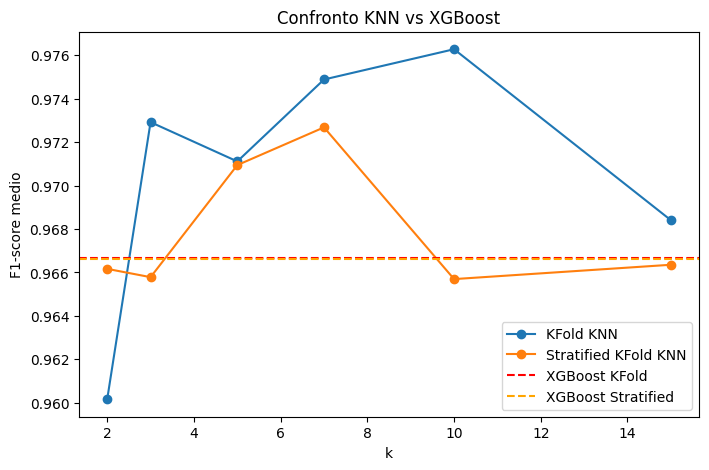

In [14]:
plt.figure(figsize=(8,5))
plt.plot(k_values, f1_kfold, 'o-', label='KFold KNN')
plt.plot(k_values, f1_skf, 'o-', label='Stratified KFold KNN')

plt.axhline(df_xgb["F1_KFold_mean"][0], color='red', linestyle='--', label='XGBoost KFold')
plt.axhline(df_xgb["F1_Stratified_mean"][0], color='orange', linestyle='--', label='XGBoost Stratified')

plt.xlabel("k")
plt.ylabel("F1-score medio")
plt.title("Confronto KNN vs XGBoost")
plt.legend()
plt.show()
